In [1]:
# Importing librairies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = pd.DataFrame(dataset['train'])

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)

In [ ]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']=='United States')].copy()

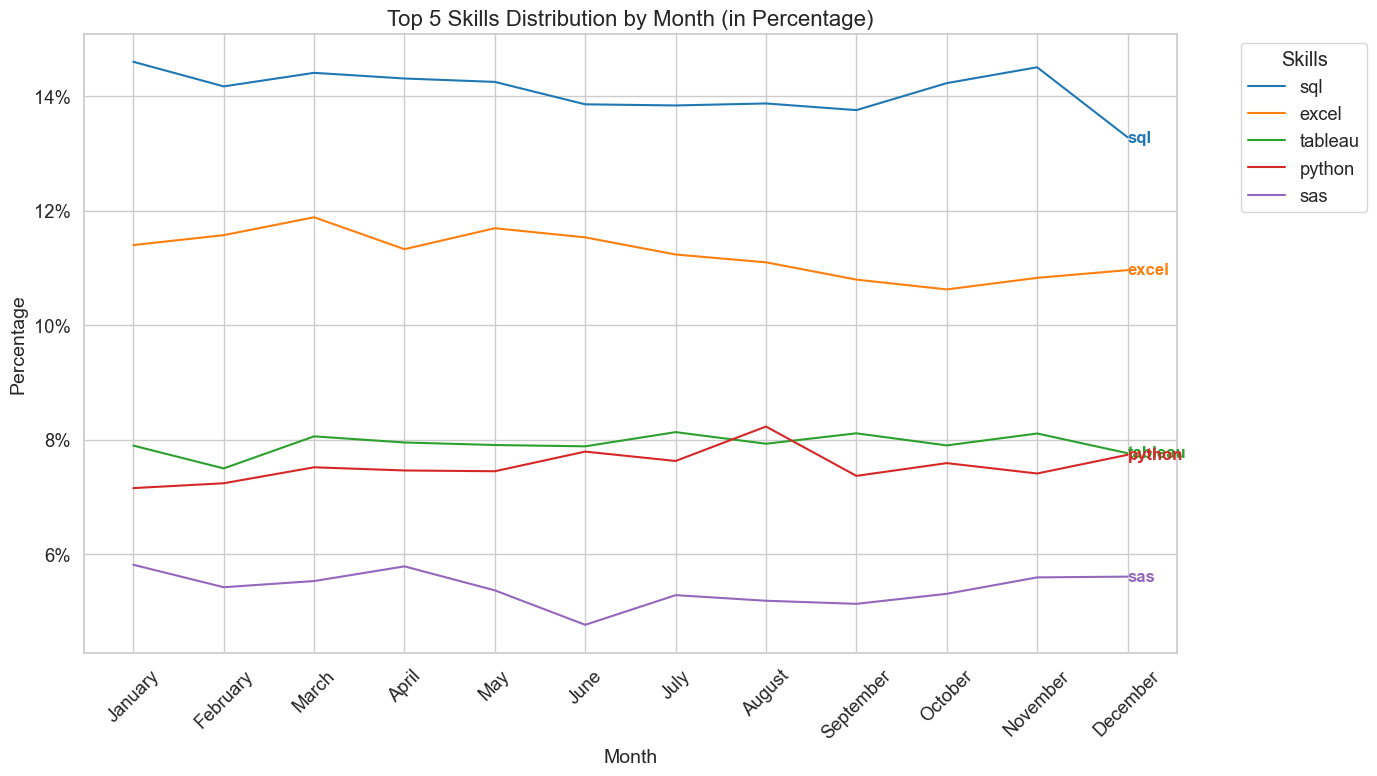

In [25]:
# 1. Add a column 'job_posted_month_no' containing the month numbers
df_da_us['job_posted_month_no'] = pd.to_datetime(df_da_us['job_posted_date']).dt.month

# 2. Explode the 'job_skills' column to have one skill per row
df_exploded = df_da_us.explode('job_skills')

# 3. Create a pivot table to count the number of skills per month
pivot_table = pd.pivot_table(
    df_exploded,
    index='job_posted_month_no',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)

# 4. Add a total row to see the total count of skills each month
pivot_table.loc['Total'] = pivot_table.sum()

# 5. Sort the skills by their total demand across all months in descending order
pivot_table = pivot_table[pivot_table.loc['Total'].sort_values(ascending=False).index]

# 6. Remove the 'Total' row for the percentage calculation and chart plotting
pivot_table_without_total = pivot_table.drop('Total')

# 7. Calculate the percentages of each skill per month
pivot_table_percentage = pivot_table_without_total.div(pivot_table_without_total.sum(axis=1), axis=0) * 100

# 8. Replace month numbers with month names for better readability on the chart
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
             5: 'May', 6: 'June', 7: 'July', 8: 'August',
             9: 'September', 10: 'October', 11: 'November', 12: 'December'}
pivot_table_percentage.index = pivot_table_percentage.index.map(month_map)

# 9. Select the top 5 most demanded skills
top_skills = pivot_table_percentage.columns[:5]
df_plot = pivot_table_percentage[top_skills].reset_index().melt(id_vars='job_posted_month_no', var_name='Skill', value_name='Percentage')

# 10. Plot using Seaborn
sns.set(style="whitegrid", font_scale=1.2)
palette = sns.color_palette("tab10", n_colors=len(top_skills))

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_plot, x='job_posted_month_no', y='Percentage', hue='Skill', palette=palette)

# Annotate each line with the corresponding skill name at the end of the line
for skill in top_skills:
    last_value = pivot_table_percentage[skill].iloc[-1]
    last_month = pivot_table_percentage.index[-1]
    plt.text(
        x=len(pivot_table_percentage) - 1,
        y=last_value,
        s=skill,
        color=palette[top_skills.tolist().index(skill)],
        fontsize=12,
        fontweight='bold',
        va='center'
    )

# Format the y-axis as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))

# Show all months on the x-axis
plt.xticks(ticks=range(len(month_map)), labels=list(month_map.values()), rotation=45)

# Customize the chart
plt.title('Top 5 Skills Distribution by Month (in Percentage)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Skills', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [21]:
pivot_table_percentage

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
January,14.599397,11.397747,7.894653,7.152150,5.813105,4.800888,4.242424,3.071553,3.084246,2.278280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003173,0.003173,0.000000,0.00000
February,14.169425,11.570802,7.496198,7.236783,5.420878,4.673942,5.018338,3.300832,3.153234,2.298953,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
March,14.406288,11.883178,8.056089,7.515742,5.528513,5.095342,4.706828,3.286741,2.987541,1.866655,...,0.004466,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
April,14.307296,11.325869,7.948991,7.460233,5.785124,4.612103,4.696525,3.088065,2.888119,1.950591,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.004443,0.000000,0.000000,0.000000,0.00000
May,14.247861,11.691968,7.905051,7.446867,5.365719,4.786089,4.747447,3.074800,2.842948,1.976263,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00552
June,13.856209,11.532317,7.881869,7.789881,4.763980,4.923747,4.788187,3.490680,3.021060,2.004357,...,0.000000,0.004841,0.000000,0.000000,0.004841,0.000000,0.000000,0.000000,0.000000,0.00000
July,13.836445,11.232499,8.130038,7.626220,5.282138,4.672253,4.672253,3.113067,2.911540,2.126644,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
August,13.871282,11.096213,7.927027,8.227694,5.184463,5.164148,4.908175,3.055420,3.031042,1.966520,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
September,13.754870,10.794126,8.109080,7.365898,5.130357,4.471082,4.914594,2.864849,2.846868,2.151633,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
